In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import numpy as np

In [2]:
file_path = "Data/intel.csv"

df = pd.read_csv(file_path, encoding='utf-8')

df.head(10)

,Student_ID,Name,Age,Parent_Name,Knowledge_Level,Learning_Speed,Last_Test_Score,Next_Level
0,1,Rohan Kaur,6,Neha Kaur,Beginner,Medium,99,Advanced
1,2,Ananya Sharma,8,Sunita Sharma,Advanced,Fast,75,Intermediate
2,3,Kabir Patel,7,Neha Patel,Intermediate,Fast,56,Beginner
3,4,Raj Das,11,Pooja Das,Advanced,Fast,59,Beginner
4,5,Neha Mehta,9,Suresh Mehta,Intermediate,Medium,95,Advanced
5,6,Aryan Sharma,6,Pooja Sharma,Beginner,Slow,68,Beginner
6,7,Meera Patel,8,Suresh Patel,Advanced,Medium,72,Intermediate
7,8,Simran Kaur,8,Sunita Kaur,Advanced,Slow,52,Beginner
8,9,Kabir Yadav,10,Rekha Yadav,Advanced,Fast,56,Beginner
9,10,Simran Gupta,9,Pooja Gupta,Intermediate,Fast,67,Beginner


In [3]:
# Encode categorical variables
label_encoders = {}
for col in ["Knowledge_Level", "Learning_Speed", "Next_Level"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  
df.head(20)

,Student_ID,Name,Age,Parent_Name,Knowledge_Level,Learning_Speed,Last_Test_Score,Next_Level
0,1,Rohan Kaur,6,Neha Kaur,1,1,99,0
1,2,Ananya Sharma,8,Sunita Sharma,0,0,75,2
2,3,Kabir Patel,7,Neha Patel,2,0,56,1
3,4,Raj Das,11,Pooja Das,0,0,59,1
4,5,Neha Mehta,9,Suresh Mehta,2,1,95,0
5,6,Aryan Sharma,6,Pooja Sharma,1,2,68,1
6,7,Meera Patel,8,Suresh Patel,0,1,72,2
7,8,Simran Kaur,8,Sunita Kaur,0,2,52,1
8,9,Kabir Yadav,10,Rekha Yadav,0,0,56,1
9,10,Simran Gupta,9,Pooja Gupta,2,0,67,1


In [4]:
features = ['Knowledge_Level', 'Learning_Speed']  # Removed 'Last_Test_Score' to prevent leakage
X = df[features]
y = df['Next_Level']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


Random Forest Model

In [7]:
# Train RandomForest with class balancing
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3465
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31       587
           1       0.42      0.43      0.43       824
           2       0.29      0.24      0.26       589

    accuracy                           0.35      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.34      0.35      0.34      2000



Cross-Validation Accuracy: 0.3287


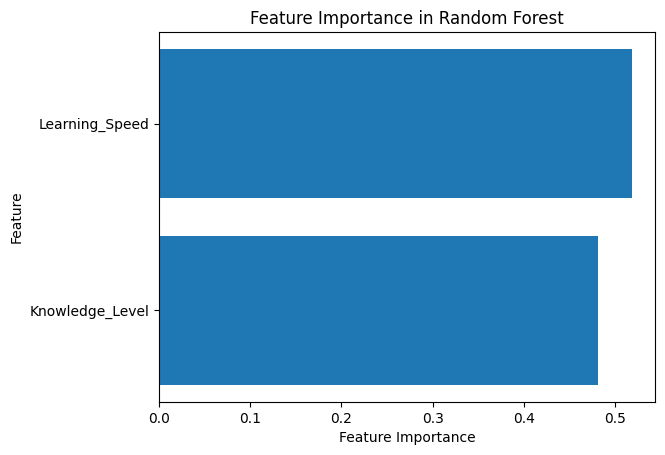

Confusion Matrix:
 [[194 243 150]
 [277 358 189]
 [193 255 141]]


In [8]:
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Feature Importance
plt.barh(features, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Xgboost Model

In [9]:
model = XGBClassifier(
    n_estimators=300,  # More trees for better learning
    learning_rate=0.1,  # Control learning speed
    max_depth=5,  # Prevent overfitting
    colsample_bytree=0.8,  # Avoid overfitting
    subsample=0.8,  # Train on 80% of data per tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.334
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.19      0.22       587
           1       0.42      0.34      0.38       824
           2       0.31      0.47      0.37       589

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.34      0.33      0.33      2000



Cross-Validation Accuracy: 0.4122


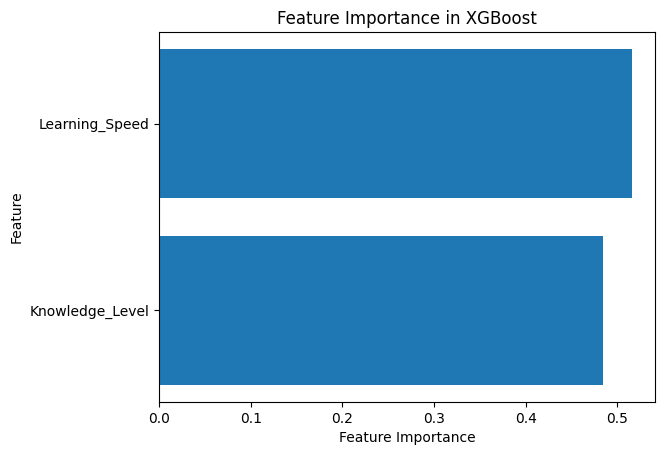

Confusion Matrix:
 [[110 197 280]
 [190 279 355]
 [129 181 279]]


In [10]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Feature Importance
plt.barh(features, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

In [11]:
import joblib

In [ ]:
joblib.dump(model, 'xgboost_model.joblib')
joblib.dump(scaler,  'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
joblib.dump(features,  'features.joblib')

['features.joblib']